In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output, display, Math, Latex
from atlas_ml import *

In [149]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [150]:
data2 = loaddata('Datasets/Classification/ex2data2.txt', ',')

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [151]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    ## the data gives the grades for two exams; 
    ## the last entry in the data is a 0 or 1: 
    ##   rejected or accepted for a certain programme
    ## make a scatter plot of the data such that 
    ## a 1 gets a black plus, the 0 a yellow (not too) large dot
    if axes == None:
        axes = plt.gca()
    ##begremove
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);
    ##endremove
    ## ...

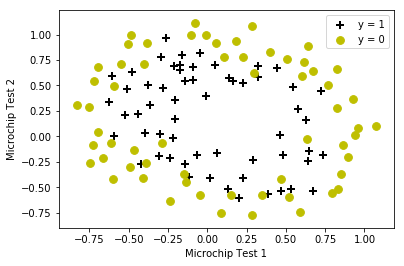

In [210]:
y = np.c_[data2[:,2]].T
X = data2[:,0:2].T
X_train = (X[:,0:-10])
Y2 = y[:,0:-10]
Y_train = one_hot(Y2,2)
X_test = (X[:,-10:])
Y_test = y[:,-10:]
Y_test = one_hot(Y_test,2)
PX_train = normalize(polynom_features(X_train,8))
PX_test = normalize(polynom_features(X_test,8))
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [227]:
#Model creation
n_in = np.shape(PX_train)[0]
n_out = np.shape(Y_train)[0]
log_reg = Logistic(n_in,n_out, CE_loss)

In [236]:
n_epochs = 500
lr = 0.1
lr_decay = 1
batch_size = X.shape[1]
beta = 0
reg_lamda = 0

epoch:500/500 | Loss:0.2127 | Train Accuracy: 0.7778 | Test_Accuracy:0.9000


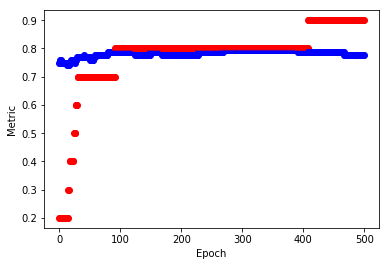

In [237]:
train(log_reg, PX_train, Y_train, PX_test, Y_test, model_accuracy, n_epochs, batch_size, lr, lr_decay, beta, reg_lamda)

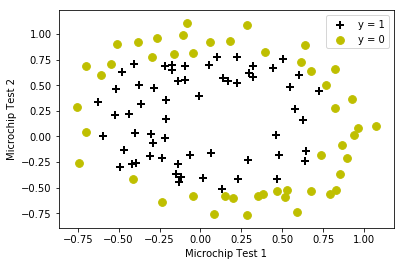

In [238]:
H = log_reg.f_pass(PX_train)
H2 = inv_one_hot(H)
A3 = np.vstack([X_train,H2])
plotData(A3.T, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

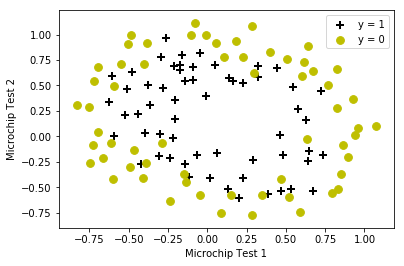

In [239]:
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')